In [265]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import seaborn as sn
import pandas as pd
import altair as alt
import numpy as np
import statsmodels.api as sm
import scipy.stats as sct
import matplotlib.pyplot as plt
import matplotlib
import pandas_profiling
import scipy
import pylab
import io
import math

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline
plt.style.use('bmh')

In [2]:
%run feat_eng.ipynb

462298 rows
183 cols
Features with missing values greater than 85% of total:
['vl_total_tancagem' 'vl_total_veiculos_antt' 'vl_total_veiculos_leves'
 'vl_total_veiculos_pesados' 'qt_art' 'vl_total_tancagem_grupo'
 'vl_total_veiculos_antt_grupo' 'vl_potenc_cons_oleo_gas'
 'de_indicador_telefone' 'vl_frota' 'qt_socios_st_suspensa'
 'qt_socios_pep' 'qt_alteracao_socio_total' 'qt_alteracao_socio_90d'
 'qt_alteracao_socio_180d' 'qt_alteracao_socio_365d' 'qt_socios_pj_ativos'
 'qt_socios_pj_nulos' 'qt_socios_pj_baixados' 'qt_socios_pj_suspensos'
 'qt_socios_pj_inaptos' 'vl_idade_media_socios_pj'
 'vl_idade_maxima_socios_pj' 'vl_idade_minima_socios_pj' 'qt_coligados'
 'qt_socios_coligados' 'qt_coligados_matriz' 'qt_coligados_ativo'
 'qt_coligados_baixada' 'qt_coligados_inapta' 'qt_coligados_suspensa'
 'qt_coligados_nula' 'idade_media_coligadas' 'idade_maxima_coligadas'
 'idade_minima_coligadas' 'coligada_mais_nova_ativa'
 'coligada_mais_antiga_ativa' 'idade_media_coligadas_ativas'
 'coligada_

feat_eng.ipynb:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  {
feat_eng.ipynb:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  {
feat_eng.ipynb:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  {
/home/marcelo/Documents/codenation_squad4/squad-4-ad-data-science-1/venv/lib/python3.7/site-packages/pandas/core/generic.

(461743, 41)
(461732, 41)
(462033, 41)


/home/marcelo/Documents/codenation_squad4/squad-4-ad-data-science-1/venv/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/marcelo/Documents/codenation_squad4/squad-4-ad-data-science-1/venv/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [3]:
print(client_transformed1.shape)
print(client_transformed2.shape)
print(client_transformed3.shape)

(461743, 98)
(461732, 98)
(462033, 98)


In [4]:
print(portfolio1_transformed.shape)
print(portfolio2_transformed.shape)
print(portfolio3_transformed.shape)


(555, 60)
(566, 89)
(265, 72)


In [5]:
def get_unmatched_col(df1,df2):
    col_list = []
    for col in df1.columns:
        if col not in df2.columns:
            col_list.append(col)    
    return col_list

def create_col(df,col_list):
    for col in col_list:
        df[col] = 0
    return df


market_random_sample1 = client_transformed1.sample(n=len(portfolio1_transformed))
market_random_sample2 = client_transformed2.sample(n=len(portfolio2_transformed))
market_random_sample3 = client_transformed3.sample(n=len(portfolio3_transformed))

col_list1 = get_unmatched_col(market_random_sample1,portfolio1_transformed) 
create_col(portfolio1_transformed,col_list1)

col_list2 = get_unmatched_col(market_random_sample1,portfolio2_transformed) 
create_col(portfolio2_transformed,col_list2)

col_list3 = get_unmatched_col(market_random_sample1,portfolio3_transformed) 
create_col(portfolio3_transformed,col_list3)


portfolio1_data = pd.concat([portfolio1_transformed[client_transformed1.columns],market_random_sample1])
portfolio2_data = pd.concat([portfolio2_transformed[client_transformed2.columns],market_random_sample2])
portfolio3_data = pd.concat([portfolio3_transformed[client_transformed3.columns],market_random_sample3])

In [6]:
print(portfolio1_data['portfolio'].value_counts())
print(portfolio2_data['portfolio'].value_counts())
print(portfolio3_data['portfolio'].value_counts())

1    555
0    555
Name: portfolio, dtype: int64
2    566
0    566
Name: portfolio, dtype: int64
3    265
0    265
Name: portfolio, dtype: int64


In [73]:
# portfolio1_treino = pd.concat([portfolio1_transformed,portfolio3_transformed],sort=False)
# portfolio1_treino['portfolio'].replace(3,0, inplace=True)
# portfolio1_treino['portfolio'].value_counts()

1    555
0    265
Name: portfolio, dtype: int64

# Portfolio1- Split Train and Test

In [267]:
x_train, x_test, y_train, y_test = train_test_split(portfolio1_data.drop('portfolio',axis=1), 
                                                    portfolio1_data['portfolio'], test_size=0.30, 
                                                    random_state=101, stratify=portfolio1_data['portfolio'])

In [268]:
y_train.value_counts()

0    389
1    388
Name: portfolio, dtype: int64

# Train model and Classification Portfolio1

In [269]:
logmodel = LogisticRegression()
logmodel.fit(x_train[['idade_maxima_socios', 'qt_funcionarios_grupo',
       'percent_func_genero_fem', 'total', 'media_meses_servicos',
       'max_meses_servicos', 'tx_crescimento_12meses',
       'tx_crescimento_24meses', 'x0_COMERCIO VAREJISTA', 'x0_OUTROS',
       'x0_SERVIÇO']],y_train)

/home/marcelo/Documents/codenation_squad4/squad-4-ad-data-science-1/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [270]:
predictions = logmodel.predict(x_test[['idade_maxima_socios', 'qt_funcionarios_grupo',
       'percent_func_genero_fem', 'total', 'media_meses_servicos',
       'max_meses_servicos', 'tx_crescimento_12meses',
       'tx_crescimento_24meses', 'x0_COMERCIO VAREJISTA', 'x0_OUTROS',
       'x0_SERVIÇO']])
print(predictions)

[0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 1
 1 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0
 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1
 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1
 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0
 0 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0]


In [271]:
predictions_prob = logmodel.predict_proba(x_test[['idade_maxima_socios', 'qt_funcionarios_grupo',
       'percent_func_genero_fem', 'total', 'media_meses_servicos',
       'max_meses_servicos', 'tx_crescimento_12meses',
       'tx_crescimento_24meses', 'x0_COMERCIO VAREJISTA', 'x0_OUTROS',
       'x0_SERVIÇO']])
print(logmodel.classes_)
#print(predictions_prob)

[0 1]


# Portfolio1 - Evaluation

In [272]:
x_test['predictions'] = predictions
y_test.value_counts()

print(y_test.value_counts())
print(x_test['predictions'].value_counts())
x_test['portfolio']= y_test

x_test[x_test['portfolio'] == 1]['predictions'].value_counts()


1    167
0    166
Name: portfolio, dtype: int64
0    168
1    165
Name: predictions, dtype: int64


1    165
0      2
Name: predictions, dtype: int64

In [273]:
result1 = pd.DataFrame(y_test.values,columns= ['Portfolio'])

result1['Predictions'] = predictions
result1[str(logmodel.classes_[0])] = predictions_prob[0:,0]
result1[str(logmodel.classes_[1])] = predictions_prob[0:,1]

result1['id'] = x_test['id'].tolist()

#result1 = pd.concat( [result1,pd.DataFrame(predictions_prob,columns = ['prob0','prob1'])])
print(result1[result1['Portfolio']==1]['Predictions'].value_counts())
result.head()

1    165
0      2
Name: Predictions, dtype: int64


,Portfolio,Predictions,id
0,0,0,dabe79bec87c88ae04e869bf6bd321ee5e1893cecf6625...
1,1,1,32e5f4e10932153a7ba869cb0386e7e02d49d2461046b8...
2,1,1,a95d6f30bba445bd3d6b0c5b36f865b38ec01d17336090...
3,0,0,6cb309685cea0b6d2988818792ec2e6fcb2bd02e0afa9e...
4,1,1,f72aa7fa6787b0a5a1c88885b6120850df8ee0f71adc25...


In [274]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       166
           1       1.00      0.99      0.99       167

    accuracy                           0.99       333
   macro avg       0.99      0.99      0.99       333
weighted avg       0.99      0.99      0.99       333



In [275]:

print(confusion_matrix(y_test, predictions))

[[166   0]
 [  2 165]]


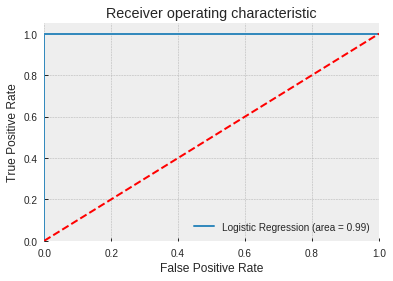

In [276]:
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(x_test[['idade_maxima_socios', 'qt_funcionarios_grupo',
       'percent_func_genero_fem', 'total', 'media_meses_servicos',
       'max_meses_servicos', 'tx_crescimento_12meses',
       'tx_crescimento_24meses', 'x0_COMERCIO VAREJISTA', 'x0_OUTROS',
       'x0_SERVIÇO']]))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(x_test[['idade_maxima_socios', 'qt_funcionarios_grupo',
       'percent_func_genero_fem', 'total', 'media_meses_servicos',
       'max_meses_servicos', 'tx_crescimento_12meses',
       'tx_crescimento_24meses', 'x0_COMERCIO VAREJISTA', 'x0_OUTROS',
       'x0_SERVIÇO']])[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Portfolio1  - Market Predictions

In [277]:
market_predictions1 = logmodel.predict(client_transformed1[['idade_maxima_socios', 'qt_funcionarios_grupo',
       'percent_func_genero_fem', 'total', 'media_meses_servicos',
       'max_meses_servicos', 'tx_crescimento_12meses',
       'tx_crescimento_24meses', 'x0_COMERCIO VAREJISTA', 'x0_OUTROS',
       'x0_SERVIÇO']])
print(market_predictions1)

[0 0 0 ... 0 0 0]


In [278]:
predictions_prob1 = logmodel.predict_proba(client_transformed1[['idade_maxima_socios', 'qt_funcionarios_grupo',
       'percent_func_genero_fem', 'total', 'media_meses_servicos',
       'max_meses_servicos', 'tx_crescimento_12meses',
       'tx_crescimento_24meses', 'x0_COMERCIO VAREJISTA', 'x0_OUTROS',
       'x0_SERVIÇO']])
print(logmodel.classes_)

[0 1]


In [279]:
#logmodel.coef_.shape
#print((len(logmodel.coef_[0])))
#print((logmodel.intercept_))

# Portfolio2- Split Train and Test

In [280]:
x_train, x_test, y_train, y_test = train_test_split(portfolio2_data.drop('portfolio',axis=1), 
                                                    portfolio2_data['portfolio'], test_size=0.30, 
                                                    random_state=101, stratify=portfolio2_data['portfolio'])

In [281]:
y_train.value_counts()

2    396
0    396
Name: portfolio, dtype: int64

# Portfolio2- Train model and Classification 

In [282]:
logmodel = LogisticRegression()
logmodel.fit(x_train[['nu_meses_rescencia', 'empsetorcensitariofaixarendapopulacao',
       'min_meses_servicos_all', 'media_meses_servicos',
       'tx_crescimento_12meses', 'x0_OUTROS', 'x0_ENTIDADES EMPRESARIAIS',
       'x0_ALTA', 'de_faixa_faturamento_estimado_encode']],y_train)

/home/marcelo/Documents/codenation_squad4/squad-4-ad-data-science-1/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [291]:
predictions = logmodel.predict(x_test[['nu_meses_rescencia', 'empsetorcensitariofaixarendapopulacao',
       'min_meses_servicos_all', 'media_meses_servicos',
       'tx_crescimento_12meses', 'x0_OUTROS', 'x0_ENTIDADES EMPRESARIAIS',
       'x0_ALTA', 'de_faixa_faturamento_estimado_encode']])
print(predictions)

[2 0 2 0 2 2 0 0 0 0 0 0 2 2 2 0 2 0 0 2 2 0 0 2 0 2 0 0 2 0 2 0 0 2 0 0 0
 0 2 0 0 0 0 2 0 0 2 0 0 2 2 2 2 0 0 2 2 0 0 0 2 0 0 2 0 2 2 2 2 2 0 2 2 2
 2 0 0 2 2 2 2 0 0 0 2 2 0 0 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 2 2 0 0 0 0 0 2
 2 0 2 0 0 2 0 0 2 0 0 0 0 2 0 2 0 2 2 2 0 2 2 2 0 0 2 0 2 2 2 2 2 2 2 0 2
 2 0 0 0 2 0 2 2 2 2 2 2 2 0 0 0 0 0 2 0 2 0 2 2 0 0 2 2 0 2 0 2 0 0 2 2 2
 0 0 2 0 2 0 2 0 0 0 0 2 2 0 0 2 2 0 0 2 0 0 2 0 2 0 2 0 2 0 0 2 0 2 0 2 0
 0 2 0 2 2 2 0 0 2 2 0 2 2 2 0 0 2 0 0 0 2 0 2 2 0 0 0 2 2 2 2 2 2 0 2 0 2
 2 0 2 0 2 0 2 2 2 0 0 2 0 2 2 0 2 2 2 2 2 0 2 2 0 2 0 0 0 0 0 0 2 2 0 2 0
 2 0 2 2 0 2 2 2 2 0 2 0 0 0 2 0 0 0 0 0 2 0 2 2 0 0 2 0 2 0 0 0 0 2 0 2 0
 2 0 0 0 0 2 0]


In [292]:
predictions_prob = logmodel.predict_proba(x_test[['nu_meses_rescencia', 'empsetorcensitariofaixarendapopulacao',
       'min_meses_servicos_all', 'media_meses_servicos',
       'tx_crescimento_12meses', 'x0_OUTROS', 'x0_ENTIDADES EMPRESARIAIS',
       'x0_ALTA', 'de_faixa_faturamento_estimado_encode']])
print(logmodel.classes_)
#print(predictions_prob)

[0 2]


# Portfolio2- Evaluation

In [285]:
x_test['predictions'] = predictions
print(y_test.value_counts())

print(y_test.value_counts())
print(x_test['predictions'].value_counts())
x_test['portfolio']= y_test

x_test[x_test['portfolio'] == 2]['predictions'].value_counts()



2    170
0    170
Name: portfolio, dtype: int64
2    170
0    170
Name: portfolio, dtype: int64
2    170
0    170
Name: predictions, dtype: int64


2    170
Name: predictions, dtype: int64

In [286]:
result2 = pd.DataFrame(y_test.values,columns= ['Portfolio'])

result2['Predictions'] = predictions
result2[str(logmodel.classes_[0])] = predictions_prob[0:,0]
result2[str(logmodel.classes_[1])] = predictions_prob[0:,1]


result2['id'] = x_test['id'].tolist()

#result1 = pd.concat( [result1,pd.DataFrame(predictions_prob,columns = ['prob0','prob1'])])
print(result2[result2['Portfolio']==2]['Predictions'].value_counts())
result2.head()

2    170
Name: Predictions, dtype: int64


,Portfolio,Predictions,0,2,id
0,2,2,0.290632,0.709368,e08596116385048de7cb359a2a1c062adaf0a4ef53e880...
1,0,0,0.999919,0.000081,f5a5857ed5def7a105d646e554cb97fe8aca5536754138...
2,2,2,0.040390,0.959610,e5ec6426b505390657311f5d3042e9e62ea43ebf6df38c...
3,0,0,0.947679,0.052321,632d23e884a00a1a32fdd37b4941812b62d4e7e39006b8...
4,2,2,0.024283,0.975717,d992145b4bec3f1f48d8878324e7ff803bc9b15241456f...


In [287]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       170
           2       1.00      1.00      1.00       170

    accuracy                           1.00       340
   macro avg       1.00      1.00      1.00       340
weighted avg       1.00      1.00      1.00       340



In [289]:
print(confusion_matrix(y_test, predictions))

[[170   0]
 [  0 170]]


In [294]:
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(x_test[['nu_meses_rescencia', 'empsetorcensitariofaixarendapopulacao',
       'min_meses_servicos_all', 'media_meses_servicos',
       'tx_crescimento_12meses', 'x0_OUTROS', 'x0_ENTIDADES EMPRESARIAIS',
        'de_faixa_faturamento_estimado_encode']]))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(x_test[['nu_meses_rescencia', 'empsetorcensitariofaixarendapopulacao',
       'min_meses_servicos_all', 'media_meses_servicos',
       'tx_crescimento_12meses', 'x0_OUTROS', 'x0_ENTIDADES EMPRESARIAIS',
       'x0_ALTA', 'de_faixa_faturamento_estimado_encode']])[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

ValueError: X has 9 features per sample; expecting 10

## Portfolio2  - Market Predictions

In [205]:
market_predictions2 = logmodel.predict(client_transformed1[['nu_meses_rescencia', 'empsetorcensitariofaixarendapopulacao',
       'min_meses_servicos_all', 'media_meses_servicos',
       'tx_crescimento_12meses', 'x0_OUTROS', 'x0_ENTIDADES EMPRESARIAIS',
       'x0_ALTA', 'de_faixa_faturamento_estimado_encode']])
print(market_predictions2)

[2 0 0 ... 0 0 0]


In [206]:
predictions_prob2 = logmodel.predict_proba(client_transformed1[['nu_meses_rescencia', 'empsetorcensitariofaixarendapopulacao',
       'min_meses_servicos_all', 'media_meses_servicos',
       'tx_crescimento_12meses', 'x0_OUTROS', 'x0_ENTIDADES EMPRESARIAIS',
       'x0_ALTA', 'de_faixa_faturamento_estimado_encode']])
print(logmodel.classes_)

[0 2]


In [186]:
#logmodel.coef_.shape
#print((len(logmodel.coef_[0])))
#print((logmodel.intercept_))

# Portfolio3 - Split Train and Test 

In [187]:
x_train, x_test, y_train, y_test = train_test_split(portfolio3_data.drop('portfolio',axis=1), 
                                                    portfolio3_data['portfolio'], test_size=0.30, 
                                                    random_state=101, stratify=portfolio3_data['portfolio'])

In [188]:
y_train.value_counts()

0    186
3    185
Name: portfolio, dtype: int64

# Portfolio3- Train model and Classification 

In [189]:
logmodel = LogisticRegression()
logmodel.fit(x_train[['idade_maxima_socios', 'qt_funcionarios_grupo',
       'percent_func_genero_fem', 'total', 'media_meses_servicos',
       'max_meses_servicos', 'tx_crescimento_12meses',
       'tx_crescimento_24meses', 'x0_COMERCIO VAREJISTA', 'x0_OUTROS',
       'x0_SERVIÇO']],y_train)

/home/marcelo/Documents/codenation_squad4/squad-4-ad-data-science-1/venv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [190]:
predictions = logmodel.predict(x_test[['idade_maxima_socios', 'qt_funcionarios_grupo',
       'percent_func_genero_fem', 'total', 'media_meses_servicos',
       'max_meses_servicos', 'tx_crescimento_12meses',
       'tx_crescimento_24meses', 'x0_COMERCIO VAREJISTA', 'x0_OUTROS',
       'x0_SERVIÇO']])
print(predictions)

[0 0 3 3 0 0 3 3 3 3 0 3 0 3 0 3 3 3 3 0 3 3 0 0 0 0 3 3 0 0 3 3 0 3 0 3 3
 0 3 3 0 0 3 0 3 0 3 3 3 0 3 3 0 3 0 0 0 0 0 3 0 3 0 0 0 0 3 3 3 0 3 3 3 3
 0 3 3 3 0 0 0 3 0 3 3 3 0 0 0 0 3 3 0 0 0 0 3 3 3 3 3 0 3 0 0 0 0 0 3 3 3
 3 3 3 0 3 0 3 3 0 3 0 3 0 0 3 3 0 3 3 3 3 0 3 0 3 0 3 3 0 0 0 0 3 3 0 0 3
 3 0 0 3 3 3 3 0 3 3 3]


In [191]:
predictions_prob = logmodel.predict_proba(x_test[['idade_maxima_socios', 'qt_funcionarios_grupo',
       'percent_func_genero_fem', 'total', 'media_meses_servicos',
       'max_meses_servicos', 'tx_crescimento_12meses',
       'tx_crescimento_24meses', 'x0_COMERCIO VAREJISTA', 'x0_OUTROS',
       'x0_SERVIÇO']])
print(logmodel.classes_)
#print(predictions_prob)

[0 3]


# Portfolio3 - Evaluation

In [192]:
x_test['predictions'] = predictions
y_test.value_counts()
print(y_test.value_counts())
print(x_test['predictions'].value_counts())
#portfolio2_teste[portfolio2_teste['portfolio'] == 2]['predictions'].value_counts()


3    80
0    79
Name: portfolio, dtype: int64
3    87
0    72
Name: predictions, dtype: int64


In [193]:
result3 = pd.DataFrame(y_test.values,columns= ['Portfolio'])
result3['Predictions'] = predictions
result3[str(logmodel.classes_[0])] = predictions_prob[0:,0]
result3[str(logmodel.classes_[1])] = predictions_prob[0:,1]

result3['id'] = x_test['id'].tolist()


#result1 = pd.concat( [result1,pd.DataFrame(predictions_prob,columns = ['prob0','prob1'])])
print(result3[result3['Portfolio']==3]['Predictions'].value_counts())
result3.head()

3    80
Name: Predictions, dtype: int64


,Portfolio,Predictions,0,3,id
0,0,0,0.866347,0.133653,c9cac88311bdac15d19bf5a43299c6ed9daad827a13949...
1,0,0,0.895887,0.104113,2db27b50e7566c843e26450360f535bd6dd250115a1d5e...
2,0,3,0.494263,0.505737,99cb292741c0ea627c98116edc8968dc2a63b760028b8e...
3,3,3,0.123160,0.876840,001f6dfaefdbbe31deedb00996c8a87dd90342690611d6...
4,0,0,0.869594,0.130406,a7094470e741a1a6e6929982e887081729ab11d9284db9...


In [194]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        79
           3       0.92      1.00      0.96        80

    accuracy                           0.96       159
   macro avg       0.96      0.96      0.96       159
weighted avg       0.96      0.96      0.96       159



## Portfolio3  - Market Predictions

In [195]:
market_predictions3 = logmodel.predict(client_transformed1[['idade_maxima_socios', 'qt_funcionarios_grupo',
       'percent_func_genero_fem', 'total', 'media_meses_servicos',
       'max_meses_servicos', 'tx_crescimento_12meses',
       'tx_crescimento_24meses', 'x0_COMERCIO VAREJISTA', 'x0_OUTROS',
       'x0_SERVIÇO']])
print(market_predictions3)

[0 0 0 ... 3 0 0]


In [196]:
predictions_prob3 = logmodel.predict_proba(client_transformed1[['idade_maxima_socios', 'qt_funcionarios_grupo',
       'percent_func_genero_fem', 'total', 'media_meses_servicos',
       'max_meses_servicos', 'tx_crescimento_12meses',
       'tx_crescimento_24meses', 'x0_COMERCIO VAREJISTA', 'x0_OUTROS',
       'x0_SERVIÇO']])
print(logmodel.classes_)

[0 3]


In [62]:
#logmodel.coef_.shape
#print((len(logmodel.coef_[0])))
#print((logmodel.intercept_))

141
[ 1.76788028 -1.38717749 -1.7436481 ]


# ANALYSIS

* Portfolio1 - 2039 clients
* Portfolio2 - 9804 clients
* Portfolio3 - 36575 clients


In [225]:
final_result = pd.DataFrame(client_transformed1['id'].tolist(),columns= ['id'])
final_result['Prediction_Portf1'] = market_predictions1
final_result['Prediction_Portf2'] = market_predictions2
final_result['Prediction_Portf3'] = market_predictions3

final_result['Prob_not_Portf1'] = predictions_prob1[0:,0]
final_result['Prob_Portf1'] = predictions_prob1[0:,1]

final_result['Prob_not_Portf2'] = predictions_prob2[0:,0]
final_result['Prob_Portf2'] = predictions_prob2[0:,1]

final_result['Prob_not_Portf3'] = predictions_prob3[0:,0]
final_result['Prob_Portf3']= predictions_prob3[0:,1]

final_result[final_result['Prediction_Portf3']==3].shape

(36575, 10)